In [1]:
##Exploring how representative baseline population is to a natural D. melanogaster populations

In [1]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/LOA/loa.orch2021.functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/FinalScripts/orch2021_functions.R")
setwd('~/dpetrov/MarkB/Orchard2021Data/')

In [41]:
##Adding baseline data to Machado et al. (https://doi.org/10.7554/eLife.67577) -

In [93]:
#Filtered sites 
load('./RData/Downsampled/orch2021_Baseline_Downsampled_Filtered.RData', verbose = TRUE)
load('./mel_freqdp_042016_Ne_fixed_correctBAVI.Rdata', verbose = TRUE)

base.filt = cbind(sites.base, afmat.base)
samps.base.filt = as.data.frame(cbind(c('base.1', 'base.2', 'base.3', 'base.4'),rep('orch', 4),
                      rep('21', 4), rep('orch', 4), rep('s.f', 4), rep('orch.base.21', 4),
                      rep('FALSE', 4),rep('FALSE', 4)))
names(samps.base.filt) = colnames(popinfo)

info = info %>% dplyr::select(X.CHROM, POS) %>% rename(chrom = X.CHROM, pos = POS)
mach.data = cbind(info, freq)
filt.data = left_join(base.filt, mach.data)
filt.data = na.omit(filt.data)

filt.sites = filt.data %>% dplyr::select(chrom, pos)
filt.freqs = filt.data %>% dplyr::select(-chrom, -pos)
filt.samps = rbind(samps.base.filt, popinfo)
save(filt.sites, filt.freqs, filt.samps, file = './orch.base21.Filtered.machado.combined.RData')

Loading objects:
  eec.base
  sites.base
  samps.base
  afmat.base
Loading objects:
  dp
  freq
  info
  popinfo


Joining with `by = join_by(chrom, pos)`


In [ ]:
#MEAN BASELINE SITES
#Filtered sites
load('./RData/Downsampled/orch2021_Baseline_Downsampled_Filtered_Mean.RData', verbose = TRUE)
load('./mel_freqdp_042016_Ne_fixed_correctBAVI.Rdata', verbose = TRUE)
base.mean = cbind(sites.base, afmat.base.mean)
samps.base.mean = as.data.frame(cbind('base.mean', 'orch', '21', 'orch', 's.f', 
                                      'orch.base.21', 'FALSE', 'FALSE'))
names(samps.base.mean) = colnames(popinfo)

info = info %>% dplyr::select(X.CHROM, POS) %>% rename(chrom = X.CHROM, pos = POS)
mach.data = cbind(info, freq)
mean.data = left_join(base.mean, mach.data)
mean.data = na.omit(mean.data)

mean.sites = mean.data %>% dplyr::select(chrom, pos)
mean.freqs = mean.data %>% dplyr::select(-chrom, -pos)
mean.samps = rbind(samps.base.mean, popinfo)
save(mean.sites, mean.freqs, mean.samps, file = './orch.base21.Mean.machado.combined.RData')

In [3]:
#Fst between four baseline reps
load('./orch.base21.Filtered.machado.combined.RData', verbose = TRUE)
fst.mat = Fst.mat(filt.freqs)
write.csv(fst.mat, './17_BaseVNaturalPopComp/FiltBase.NaturalPop.fst.csv', row.names = FALSE)



Loading objects:
  filt.sites
  filt.freqs
  filt.samps


In [73]:
fst.mat  = read.csv('./17_BaseVNaturalPopComp/FiltBase.NaturalPop.fst.csv')


In [74]:
#what does distribution of Fst values look like between baseline and CA, Europe, and PA?
###what are indices of ca, europe (VI, OUK,BA ) and PA?
##CA - ca.cols = (filt.samps %>% filter(R %in% c('ca')))$col.num
##PA - pa.cols = as.character((filt.samps %>% filter(P %in% c('PA')))$col.num)
##EU - 19, 20, 41, 42, 45, 49
filt.samps$index = row.names(filt.samps)
filt.samps$col.num = c(1:nrow(filt.samps))
as.vector((filt.samps %>% filter(R %in% c('ca')))$col.num)
as.vector(as.character((filt.samps %>% filter(P %in% c('PA')))$col.num))
##CA - ca.cols = (filt.samps %>% filter(R %in% c('ca')))$col.num
##PA - pa.cols = as.character((filt.samps %>% filter(P %in% c('PA')))$col.num)
##EU - 19, 20, 41, 42, 45, 49

fst.pa = as.data.frame(t(fst.mat[1:4, c(27, 33, 34, 35, 36, 37, 39, 40, 42, 51, 61, 62, 70, 71)]))
names(fst.pa) = c('fst.base1', 'fst.base2', 'fst.base3', 'fst.base4')
fst.pa$comp = 'PA'
fst.pa = fst.pa %>% gather(1:4, key = 'base.samp', value = fst)


fst.ca = as.data.frame(t(fst.mat[1:4, c(5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)]))
names(fst.ca) = c('fst.base1', 'fst.base2', 'fst.base3', 'fst.base4')
fst.ca$comp = 'CA'
fst.ca = fst.ca %>% gather(1:4, key = 'base.samp', value = fst)

fst.eu = as.data.frame(t(fst.mat[1:4, c(22,23,44,45,48,52)]))
names(fst.eu) = c('fst.base1', 'fst.base2', 'fst.base3', 'fst.base4')
fst.eu$comp = 'EU'
fst.eu = fst.eu %>% gather(1:4, key = 'base.samp', value = fst)


fst = rbind(fst.pa, fst.ca, fst.eu)

[1]  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

[1] "27" "33" "34" "35" "36" "37" "39" "40" "42" "51" "61" "62" "70" "71"

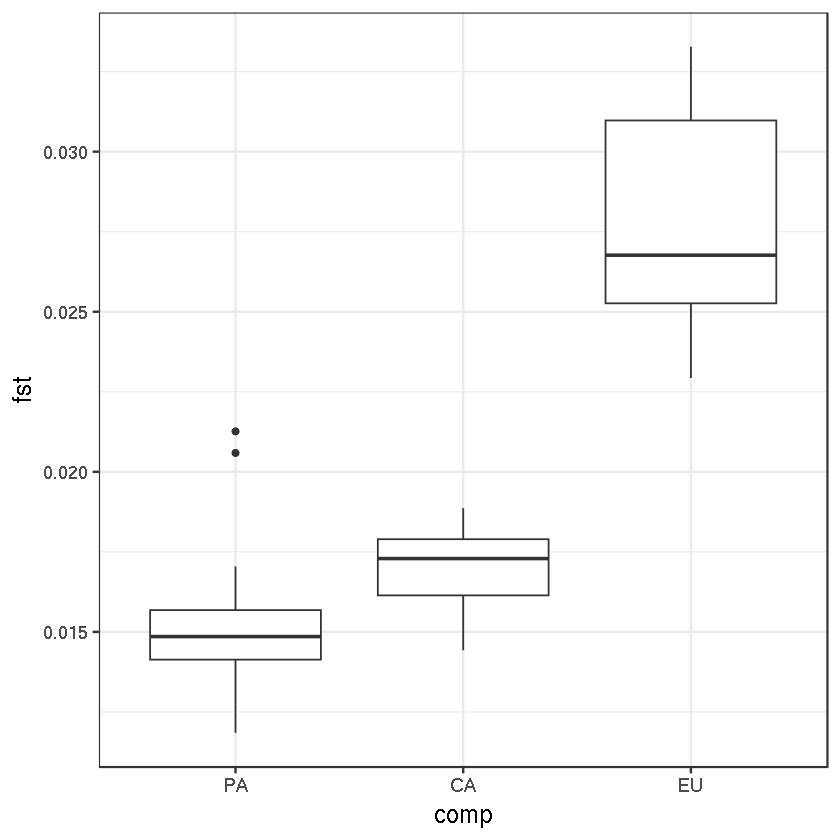

In [75]:
ggplot(fst, aes(x = comp, y = fst)) +
    geom_boxplot() +
    scale_x_discrete(limits = c('PA', 'CA', 'EU')) +
    theme_bw(base_size = 15)

In [76]:
#stats - orchard baseline vs. PA Fst, compared to Orhcard v. CA and EU populations
t.test((fst %>% filter(comp == 'PA'))$fst, (fst %>% filter(comp == 'CA'))$fst , alternative = 'less' )
t.test((fst %>% filter(comp == 'PA'))$fst, (fst %>% filter(comp == 'EU'))$fst , alternative = 'less' )


	Welch Two Sample t-test

data:  (fst %>% filter(comp == "PA"))$fst and (fst %>% filter(comp == "CA"))$fst
t = -6.0091, df = 82.394, p-value = 2.434e-08
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
         -Inf -0.001310498
sample estimates:
 mean of x  mean of y 
0.01516590 0.01697808 



	Welch Two Sample t-test

data:  (fst %>% filter(comp == "PA"))$fst and (fst %>% filter(comp == "EU"))$fst
t = -16.506, df = 29.855, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        -Inf -0.01121974
sample estimates:
 mean of x  mean of y 
0.01516590 0.02767177 


In [77]:
#what about PA vs northeast pops, CA, and EU?
#get PA rows

In [78]:
#what are indices of eastern NA pops?
as.vector(filt.samps %>% filter(!R %in% c('orch', 'ca', 'pa')) %>% filter(!P %in% c('VI', 'BA', 'OUK')))$col.num

[1] 24 25 26 28 29 30 31 32 38 41 43 46 47 49 50 53 54 55 56 57 58 59 60 63 64
[26] 65 66 67 68 69 72 73 74 75 76 77

In [82]:
fst.pa = fst.mat[c(27, 33, 34, 35, 36, 37, 39, 40, 42, 51, 61, 62, 70, 71),]

fst.pa.ena = as.data.frame(as.vector(as.matrix(fst.pa[, c(24, 25, 26, 28, 29, 30, 31, 32, 38, 41, 43, 46,
                                                         47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60,
                                                         63, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77)])))
names(fst.pa.ena) = c('fst')
fst.pa.ena$comp = 'East.NA'

fst.pa.ca = as.data.frame(as.vector(as.matrix(fst.pa[, c(5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21)])))
names(fst.pa.ca) = c('fst')
fst.pa.ca$comp = 'CA'

fst.pa.eu = as.data.frame(as.vector(as.matrix(fst.pa[, c(22,23,44,45,48,52)])))
names(fst.pa.eu) = c('fst')
fst.pa.eu$comp = 'EU'


In [83]:
fst.pa = rbind(fst.pa.ca,fst.pa.ena, fst.pa.eu)

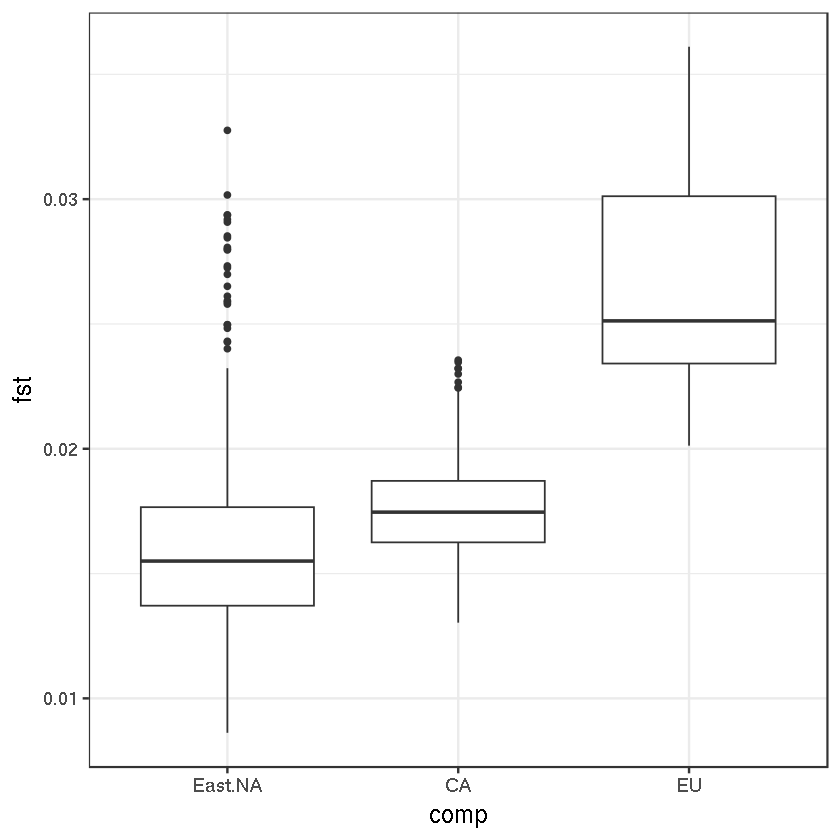

In [84]:
ggplot(fst.pa, aes(x = comp, y = fst)) +
    geom_boxplot() +
    scale_x_discrete(limits = c('East.NA', 'CA', 'EU')) +
    theme_bw(base_size = 15)

In [85]:
#stats
t.test((fst.pa %>% filter(comp == 'East.NA'))$fst, (fst.pa %>% filter(comp == 'CA'))$fst , alternative = 'less' )
t.test((fst.pa %>% filter(comp == 'East.NA'))$fst, (fst.pa %>% filter(comp == 'EU'))$fst , alternative = 'less' )


	Welch Two Sample t-test

data:  (fst.pa %>% filter(comp == "East.NA"))$fst and (fst.pa %>% filter(comp == "CA"))$fst
t = -6.5235, df = 726.25, p-value = 6.438e-11
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
         -Inf -0.001040974
sample estimates:
 mean of x  mean of y 
0.01617851 0.01757105 



	Welch Two Sample t-test

data:  (fst.pa %>% filter(comp == "East.NA"))$fst and (fst.pa %>% filter(comp == "EU"))$fst
t = -21.966, df = 108.64, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
         -Inf -0.009525441
sample estimates:
 mean of x  mean of y 
0.01617851 0.02648214 


In [86]:
##Now, combine dataframes and generate figures for paper
fst.pa = fst.pa %>% mutate(comp = case_when(comp == 'East.NA' ~ 'PA Pop:East NA Pops',
                                           comp == 'CA' ~ 'PA Pop:CA Pop',
                                           comp == 'EU' ~ 'PA Pop:EU Pops')
                          )

fst = fst %>% dplyr::select(comp, fst) %>%
    mutate(comp = case_when(comp == 'PA' ~ 'Baseline:PA Pop',
                           comp == 'CA' ~ 'Baseline:CA Pop',
                           comp == 'EU' ~ 'Baseline:EU Pop'))
fst.meta = rbind(fst, fst.pa)

In [98]:
p = ggplot(fst.meta, aes(x = comp, y = fst)) +
    geom_boxplot() +
    scale_x_discrete(limits = c('Baseline:PA Pop', 'Baseline:CA Pop', 'Baseline:EU Pop',
                               'PA Pop:East NA Pops','PA Pop:CA Pop', 'PA Pop:EU Pops')) +
    theme_bw(base_size = 15) +
    xlab('') +
    ylab('Fst') 


ggsave('./Figures/Fst/Baseline.NatPop.Fst.pdf',p ,height = 12, width = 16)


In [99]:
head(fst.meta)

,comp,fst
,<chr>,<dbl>
1,Baseline:PA Pop,0.01459560
2,Baseline:PA Pop,0.01512485
3,Baseline:PA Pop,0.01701553
4,Baseline:PA Pop,0.01586006
5,Baseline:PA Pop,0.02126576
6,Baseline:PA Pop,0.01561024


In [ ]:
#stats - is baseline significantly more differentiated from local PA pop is than PA pop is to other Eastern NA pops?

#No!
t.test((fst.meta %>% filter(comp == 'Baseline:PA Pop'))$fst, 
       (fst.meta %>% filter(comp == 'PA Pop:East NA Pops'))$fst, alternative = 'greater')

In [2]:
##comparison of common and rare alleles w/ PA wild population
#1. get representative linvilla sample - spring 2015 and fall 2015
#2. ID all snps w/ maf > 20%; btwn 5 and 20% and; below 5%
#3. compare w/ orchard baseline mean


In [3]:
load('./orch.base21.Mean.machado.combined.RData', verbose = TRUE)

Loading objects:
  mean.sites
  mean.freqs
  mean.samps


In [4]:
df.base = mean.freqs[,1]
df.base = cbind(mean.sites, df.base)
df.base = df.base %>% mutate(snp = paste0(chrom, pos))
names(df.base) = c('chrom', 'pos', 'freq', 'snp')
df.base.co = (df.base %>% filter(freq >= 0.2) %>% filter(freq <= 0.8))$snp
df.base.ra = (df.base %>% filter(freq < 0.2 | freq > 0.8))$snp

In [5]:
df.ln.15 = cbind(mean.samps, t(mean.freqs))
df.ln.15 = df.ln.15 %>% filter(pops %in% c('mel15LN10_FAT', 'mel15LN7_SPT'))
df.ln.15 = df.ln.15[,-c(1:ncol(mean.samps))]
df.ln.15 = t(df.ln.15)
df.ln.15 = cbind(mean.sites, df.ln.15)
df.ln.15.fa = df.ln.15[,c(1, 2, 3)]
df.ln.15.sp = df.ln.15[,c(1, 2, 4)]

names(df.ln.15.fa) = c('chrom', 'pos', 'freq')
df.ln.15.fa = df.ln.15.fa %>% mutate(snp = paste0(chrom, pos))
names(df.ln.15.sp) = c('chrom', 'pos', 'freq')
df.ln.15.sp = df.ln.15.sp %>% mutate(snp = paste0(chrom, pos))

In [6]:
sites.fa.com = (df.ln.15.fa %>% filter(freq >= 0.2) %>% filter(freq <= 0.8))$snp
sites.fa.ra = (df.ln.15.fa %>% filter(freq < 0.2 | freq > 0.8))$snp
sites.sp.com = (df.ln.15.sp %>% filter(freq >= 0.2) %>% filter(freq <= 0.8))$snp
sites.sp.ra = (df.ln.15.sp %>% filter(freq < 0.2 | freq > 0.8))$snp

In [7]:
##Get percentage overlapping of common and rare snps of baseline and the spring and fall linvilla samples:
(length(intersect(df.base.co, sites.sp.com)))/length(df.base.co)
(length(intersect(df.base.co, sites.fa.com)))/length(df.base.co)
(length(intersect(df.base.ra, sites.sp.ra)))/length(df.base.ra)
(length(intersect(df.base.ra, sites.fa.ra)))/length(df.base.ra)

[1] 0.8655944

[1] 0.8452068

[1] 0.8853584

[1] 0.877322

In [8]:
#Get percentage overlapping of overlapping spring to fall 
(length(intersect(sites.fa.com, sites.sp.com)))/length(sites.fa.com)
(length(intersect(sites.fa.ra, sites.sp.ra)))/length(sites.fa.ra)


[1] 0.862001

[1] 0.9102499

In [16]:
#Stats - is overlap between baseline and spring pop less than spring v. fall pop?
    ###NO - no need for stats b/c the percentage/ratio is even greater for the baseline v. spring than spring v. fall


[1] 323818

ERROR: Error in base::setdiff(x, y, ...): argument "y" is missing, with no default


In [30]:
base.ln.co = c(length(intersect(df.base.co, sites.sp.com)), 
              length(setdiff(df.base.co, sites.sp.com)))
lnsp.lnfa.co = c((length(intersect(sites.fa.com, sites.sp.com))), 
                length(setdiff(sites.fa.com, sites.sp.com)))
data.co = as.data.frame(rbind(base.ln.co, lnsp.lnfa.co))
data.co
result.co = chisq.test(data.co)
result.co$p.value/2

##siginificantly greater overlap between baseline and spring, than spring v. baseline

,V1,V2
,<int>,<int>
base.ln.co,323818,50281
lnsp.lnfa.co,342298,54799


[1] 2.174885e-06

In [31]:
base.ln.ra = c(length(intersect(df.base.ra, sites.sp.ra)), 
              length(setdiff(df.base.ra, sites.sp.ra)))
lnsp.lnfa.ra = c((length(intersect(sites.fa.ra, sites.sp.ra))), 
                length(setdiff(sites.fa.ra, sites.sp.ra)))
data.ra = as.data.frame(rbind(base.ln.ra, lnsp.lnfa.ra))
data.ra
result.ra = chisq.test(data.ra)
result.ra$p.value/2


,V1,V2
,<int>,<int>
base.ln.ra,583893,75606
lnsp.lnfa.ra,579375,57126


[1] 0